In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
datFrame=pd.read_csv('titanic.csv')
datFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datFrameFreatur=datFrame
datFrameFreatur.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
datFrameFreatur

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
le=LabelEncoder()
datFrameFreatur['Sex']=le.fit_transform(datFrameFreatur['Sex'])
datFrameFreatur.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [5]:
column=datFrameFreatur.columns
column


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [6]:
datFrameFreatur.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
mm=datFrameFreatur.Age.median()
datFrameFreatur['Age'].fillna(mm,inplace=True)
datFrameFreatur.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [8]:
inputd=datFrameFreatur[[column[1],column[2],column[3],column[4]]]
inputd

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,28.0,23.4500
889,1,1,26.0,30.0000


In [9]:
target=datFrameFreatur[column[0]]
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
xTrain,xTest,yTrain,yTest=train_test_split(inputd,target,train_size=0.9)
model=DecisionTreeClassifier()

In [11]:
model.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [12]:
model.predict(xTest)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [13]:
model.score(xTest,yTest)

0.7555555555555555

In [1]:
fig = ptl.figure(figsize=(50,20))
gg=tree.plot_tree(model,filled=True,feature_names=[column[1],column[2],column[3],column[4]])


NameError: name 'ptl' is not defined

In [25]:
fig.savefig("decistion_tree.png")


[Text(106.27885777828467, 212.71304347826086, 'Pclass <= 0.5\ngini = 0.477\nsamples = 801\nvalue = [487, 314]\nclass = Pclass'),
 Text(52.0452098540146, 203.2591304347826, 'Survived <= 2.5\ngini = 0.38\nsamples = 290\nvalue = [74, 216]\nclass = Sex'),
 Text(20.16131386861314, 193.80521739130435, 'Sex <= 2.5\ngini = 0.095\nsamples = 160\nvalue = [8, 152]\nclass = Sex'),
 Text(17.717518248175182, 184.3513043478261, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Pclass'),
 Text(22.605109489051095, 184.3513043478261, 'Age <= 28.856\ngini = 0.084\nsamples = 159\nvalue = [7, 152]\nclass = Sex'),
 Text(15.884671532846715, 174.89739130434782, 'Age <= 28.231\ngini = 0.172\nsamples = 63\nvalue = [6, 57]\nclass = Sex'),
 Text(13.44087591240876, 165.44347826086957, 'Sex <= 23.5\ngini = 0.148\nsamples = 62\nvalue = [5, 57]\nclass = Sex'),
 Text(10.997080291970804, 155.98956521739132, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Sex'),
 Text(15.884671532846715, 155.98956521739132, 'Sex <= 

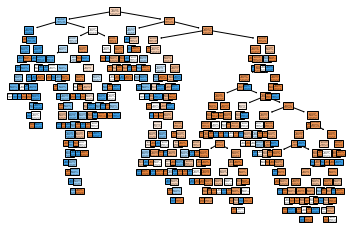

In [23]:

tree.plot_tree(model, feature_names=column.values,class_names=[column[1],column[2],column[3],column[4]],filled=True)
